# New section

Mounted at /content/drive


In [ ]:
import pandas as pd

#defining file path - mounted it to google drive
file_path = '/content/drive/MyDrive/Colab Notebooks/fundamentals.csv'

#reading the csv file
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print(df.head())


   Unnamed: 0 Ticker Symbol Period Ending  Accounts Payable  \
0           0           AAL    2012-12-31      3.068000e+09   
1           1           AAL    2013-12-31      4.975000e+09   
2           2           AAL    2014-12-31      4.668000e+09   
3           3           AAL    2015-12-31      5.102000e+09   
4           4           AAP    2012-12-29      2.409453e+09   

   Accounts Receivable  Add'l income/expense items  After Tax ROE  \
0         -222000000.0               -1.961000e+09           23.0   
1          -93000000.0               -2.723000e+09           67.0   
2         -160000000.0               -1.500000e+08          143.0   
3          352000000.0               -7.080000e+08          135.0   
4          -89482000.0                6.000000e+05           32.0   

   Capital Expenditures  Capital Surplus  Cash Ratio  ...  \
0         -1.888000e+09     4.695000e+09        53.0  ...   
1         -3.114000e+09     1.059200e+10        75.0  ...   
2         -5.311000e+09

# **PART 1 - Data Exploration and Visualization**

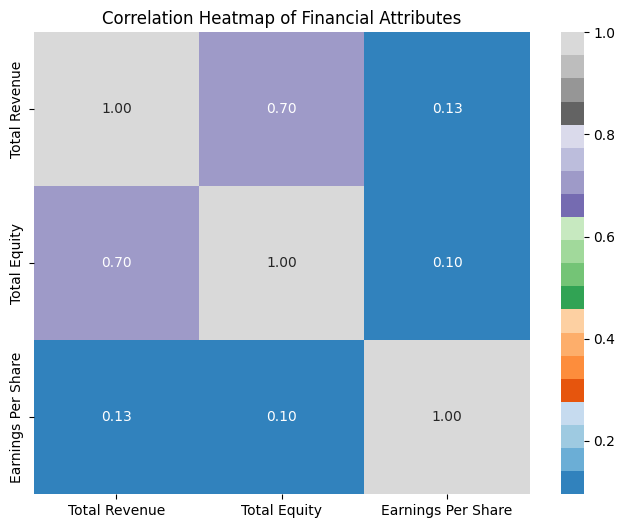

In [ ]:

# EDA 1

# Necessary imports

import matplotlib.pyplot as plt
import seaborn as sns

# Dropping NA values
df.dropna(inplace=True)

# Selecting relevant attributes for the heatmap
metrics = ['Total Revenue', 'Total Equity', 'Earnings Per Share']

#finding the correlation
corr_data = df[metrics].corr()

# Creating the heatmap with the attributes
plt.figure(figsize=(8, 6))
sns.heatmap(corr_data, annot=True, cmap='tab20c', fmt=".2f")
plt.title("Correlation Heatmap of Financial Attributes")
plt.show()




INSIGHTS :

 A value of 1.00 indicates a perfect positive relationship, which means as one attribute increases, the other one does too, to the same extent.

1.   The gradient in color intensity shows different levels of correlation . For example, 'Total Revenue' and 'Total Equity' have a high positive correlation (0.70), which means they tend to move together in the same direction.
2.   On the other hand, 'Earnings Per Share' has a very low correlation with 'Total Revenue' and 'Total Equity' (0.13 and 0.10, respectively), indicating a very weak relationship.


Text(0, 0.5, 'Total Liabilities')

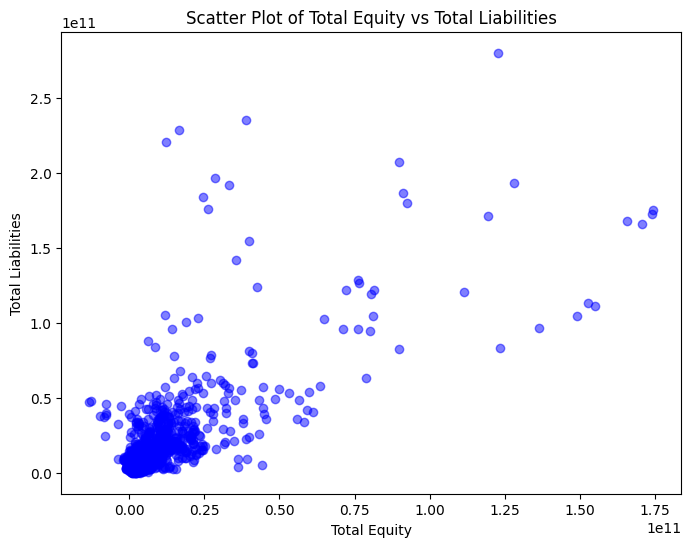

In [ ]:
#EDA 2

# Necessary imports
import pandas as pd
import matplotlib.pyplot as plt

df.dropna(inplace=True)

x_attribute = 'Total Equity'
y_attribute = 'Total Liabilities'

# Creating the scatter plot for the attributes

plt.figure(figsize=(8, 6))
plt.scatter(df[x_attribute], df[y_attribute], alpha=0.5,color='blue')
plt.title(f'Scatter Plot of {x_attribute} vs {y_attribute}')
plt.xlabel(x_attribute)
plt.ylabel(y_attribute)


INSIGHTS:

The above figure shows a scatter plot between total liabilities and total equity

* As 'Total Equity' increases, 'Total Liabilities' also tend to increase. This shows that companies with more funds of their own (equity) often implies more debt.

* Most of the data points are clustered at the lower end of both 'Total Equity' and 'Total Liabilities', indicating that the maximum no. of the companies in the dataset have lower amounts of both equity and liabilities.








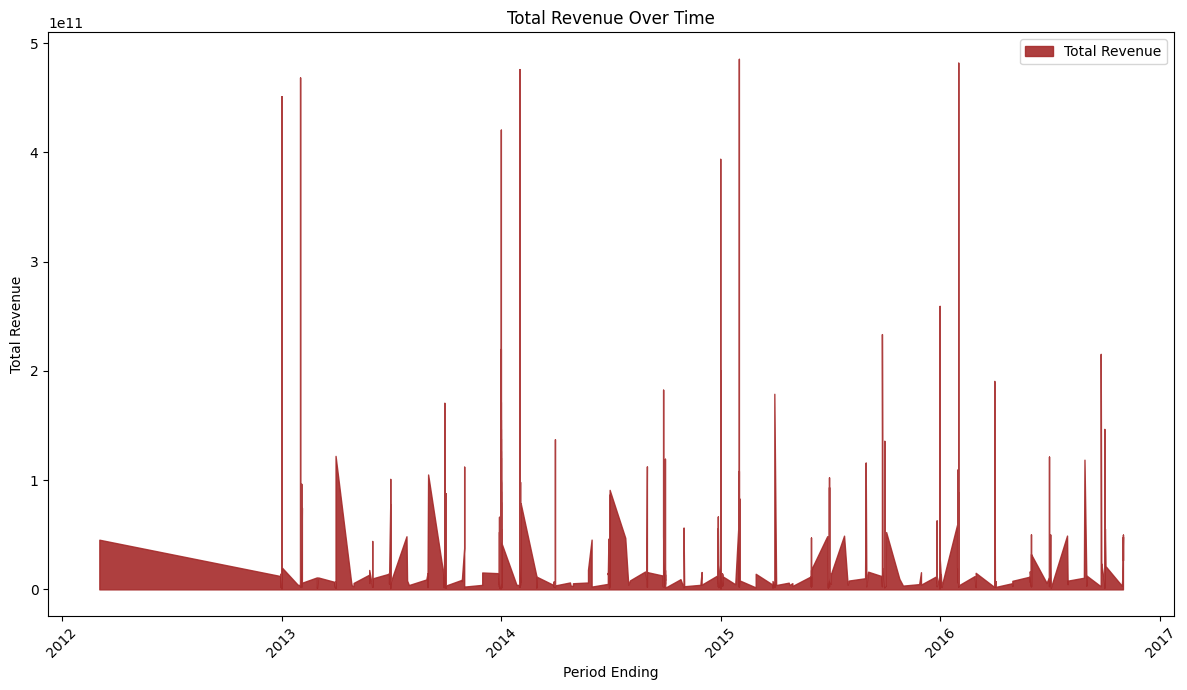

In [ ]:
#EDA3
# Necessary import
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 7))

#PLooting an area plot
plt.fill_between(df['Period Ending'], df['Total Revenue'], label='Total Revenue', color='brown', alpha=0.9)
plt.xlabel('Period Ending')
plt.ylabel('Total Revenue')
plt.title('Total Revenue Over Time')

# Rotating the x-axis labels to make them readable
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

# Adjusting the plot to ensure everything fits without overlapping
plt.show()


INSIGHTS:

* The company's total revenue has experienced various fluctuations over time, with the peaks suggesting periods of high revenue.

*  There is no clear upward or downward trend in total revenue from 2012 to 2017, indicating variability in the company's financial performance without a consistent direction of growth or decline.



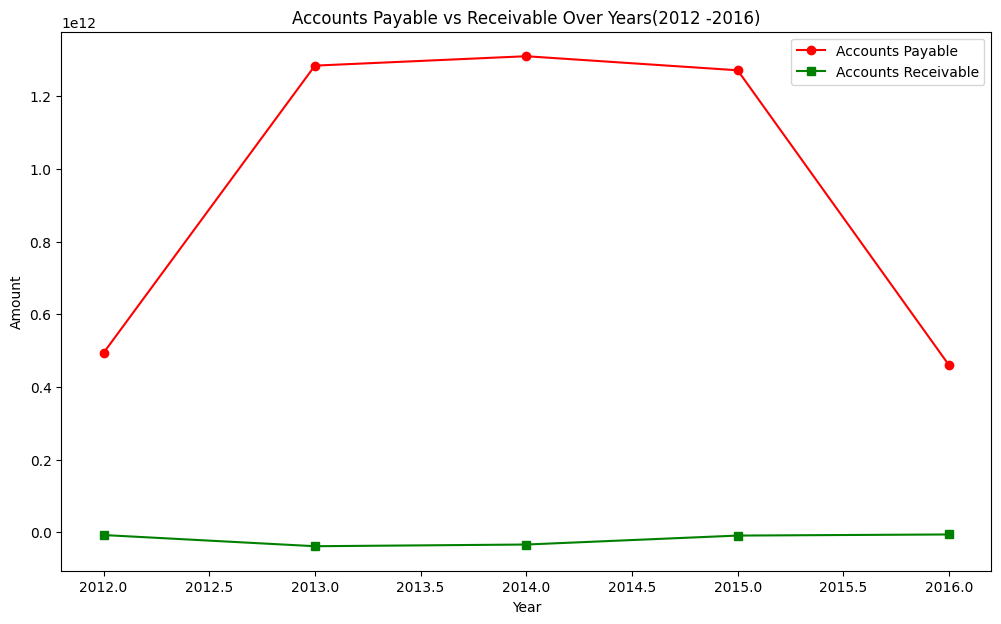

In [ ]:
# Necessary imports
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is a DataFrame that has already been created and manipulated as described

# Convert 'Period Ending' to datetime, specifying the format for parsing
df['Period Ending'] = pd.to_datetime(df['Period Ending'], format='%d-%m-%Y')

# Extract year from 'Period Ending'
df['Year'] = df['Period Ending'].dt.year

# Group by 'Year' and calculate the sum of 'Accounts Payable' and 'Accounts Receivable'
grouped_df = df.groupby('Year')[['Accounts Payable', 'Accounts Receivable']].sum()

# Plot the results using a line plot
plt.figure(figsize=(12, 7))
plt.plot(grouped_df.index, grouped_df['Accounts Payable'], marker='o', label='Accounts Payable', color="red")
plt.plot(grouped_df.index, grouped_df['Accounts Receivable'], marker='s', label='Accounts Receivable', color="green")
plt.title('Accounts Payable vs Receivable Over Years(2012 -2016)')
plt.xlabel('Year')
plt.ylabel('Amount')
plt.legend()
plt.show()



INISGHTS:


1. There is an upward trend in 'Accounts Payable' from 2012 to 2013, followed by a constant value over 2013 -2014 and then a sharp decline in 2015- 2016, while 'Accounts Receivable' remains constant over the same period.

2.   The amount of 'Accounts Payable' is significantly higher than 'Accounts Receivable' throughout the years, indicating the company may be accumulating more debt compared to the credit it is issuing to its customers.



# **PART 2 - Linear Regression Model Development**

In [65]:
##Linear Regression Model Development -  Create linear regression to predict Estimated Shares Outstanding. Explain your model.
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.formula import api as smf

y=df['Estimated Shares Outstanding']
x=df.drop(columns=['Ticker Symbol','Period Ending',y.name])
model_org=smf.ols(data=df,formula= 'y~x').fit()
model_org.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     97.06
Date:                Thu, 18 Jan 2024   Prob (F-statistic):               0.00
Time:                        07:06:49   Log-Likelihood:                -27506.
No. Observations:                1299   AIC:                         5.516e+04
Df Residuals:                    1224   BIC:                         5.555e+04
Df Model:                          74                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.427e+08      1e+09      0.741      0.459   -1.22e+09    2.71e+09
x[0]       -1.953e+04   2.32e+04     -0.842      0.400    -6.5e+04     2.6e+04
x[1]        -181.0473    239.012     -0.757      0.449    -649.967     287.872
x[2]          -0.0693      0.057     -1.220      0.223      -0.181       0.042
x[3]           0.0369      0.057      0.648      0.517      -0.075       0.149
x[4]       -6.413e+05   5.01e+05     -1.280      0.201   -1.62e+06    3.42e+05
x[5]           0.8500      2.398      0.354      0.723      -3.854       5.554
x[6]           0.0149      0.009      1.630      0.103      -0.003       0.033
x[7]          6.8e+05   3.83e+05      1.776      0.076   -7.13e+04    1.43e+06
x[8]          -1.2367      0.617     -2.004      0.045      -2.447      -0.026
x[9]          -0.0878      0.060     -1.460      0.144      -0.206       0.030
x[10]         -0.0015      0.010     -0.150      0.881      -0.020       0.018
x[11]       2757.8942   3721.809      0.741      0.459   -4543.938    1.01e+04
x[12]       -1.85e+05   2.95e+05     -0.627      0.531   -7.64e+05    3.94e+05
x[13]         -0.0757      0.990     -0.076      0.939      -2.017       1.866
x[14]          0.0034      0.099      0.034      0.973      -0.191       0.198
x[15]         -0.0811      0.057     -1.428      0.154      -0.193       0.030
x[16]         21.1307     39.574      0.534      0.593     -56.509      98.770
x[17]        -21.4518     39.573     -0.542      0.588     -99.090      56.186
x[18]         -0.0248      0.166     -0.149      0.881      -0.350       0.300
x[19]          0.1122      0.082      1.375      0.169      -0.048       0.272
x[20]         -0.0746      0.989     -0.075      0.940      -2.016       1.867
x[21]         -0.0816      0.989     -0.082      0.934      -2.023       1.859
x[22]      -1.511e+05   7.36e+05     -0.205      0.837    -1.6e+06    1.29e+06
x[23]       2757.8914   3721.809      0.741      0.459   -4543.941    1.01e+04
x[24]          0.1555      0.067      2.331      0.020       0.025       0.286
x[25]         -0.0718      0.989     -0.073      0.942      -2.013       1.870
x[26]        -21.4033     39.573     -0.541      0.589     -99.042      56.236
x[27]         -1.2528      0.618     -2.027      0.043      -2.465      -0.040
x[28]          0.8344      2.398      0.348      0.728      -3.871       5.540
x[29]         -0.0619      0.052     -1.184      0.237      -0.164       0.041
x[30]          0.0280      0.099      0.283      0.777      -0.166       0.223
x[31]         -0.0922      0.989     -0.093      0.926      -2.033       1.849
x[32]          0.0101      0.101      0.100      0.920      -0.188       0.208
x[33]          0.3365      0.137      2.464      0.014       0.069       0.604
x[34]          0.1043      0.021      5.061      0.000       0.064       0.145
x[

INSIGHT:

1) The dataset has been split into two parts: 'y', which has the 'Estimated Shares Outstanding' data, and 'x', which includes all other data points except for 'Ticker Symbol', 'Period Ending', and 'Estimated Shares Outstanding'. We then used 'x' to predict 'y'.

2) The model's R-squared value is 0.854, meaning it can explain about 85.4% of the variability in 'y' using the 'x' variables.

3) With a high F-statistic and a p-value below 0.05, the model is set to be statistically significant at the 5% level.

# **PART 3 : Multicollinearity**

**Multicollinearity** in linear regression refers to a situation where two or more predictor variables are highly correlated with each other. This can significantly impact the interpretation of the model's coefficients in the following ways:

1. **Unstable Coefficients**: When predictor variables are highly correlated, small changes in the data can lead to large changes in the model coefficients. This instability makes it difficult to predict the outcome or understanding the importance of each predictor.

2. **Significance Problems**: Even if a variable is genuinely influential, multicollinearity can make its coefficient appear statistically insignificant. This happens because it's hard to differentiate the effect of one variable from the others when they are highly correlated.

3. **Difficult Interpretation**: In the presence of multicollinearity, interpreting the coefficients becomes problematic. Normally, a coefficient tells us how much the dependent variable changes for a one-unit change in the predictor, holding other variables constant. But when predictors are correlated, this "holding other variables constant" condition doesn't really hold, making such interpretations less meaningful.

# **PART 4 - P-Value Analysis and Histogram**

(0.19038890685062138, 0.006430959176342998)

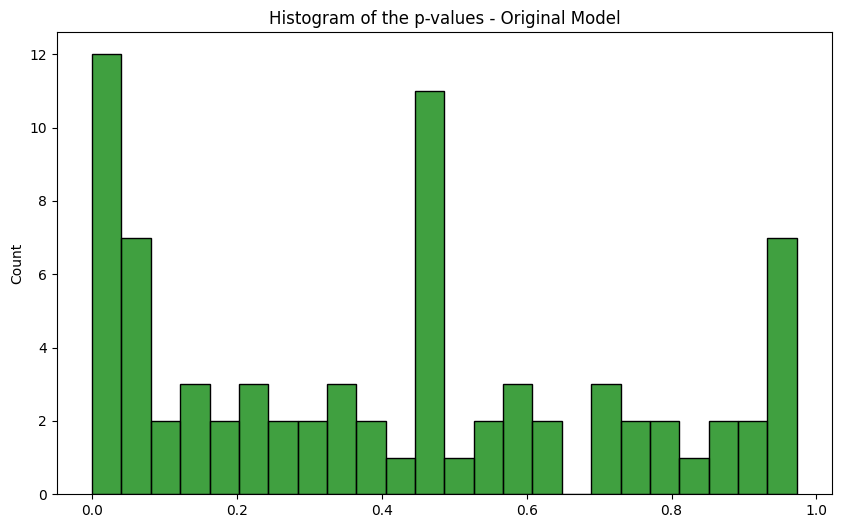

In [66]:
#Necessary Imports

import statsmodels.api as sm
import pandas as pd
from scipy.stats import skew


p_values_list=list(model_org.pvalues)
plt.figure(figsize=(10, 6))
sns.histplot(p_values_list,bins=24, color ="green")
plt.title('Histogram of the p-values - Original Model')


#As mentioned in the canvas code - formal test to check for skewness
from scipy.stats import kstest

ks_statistic, ks_pvalue = kstest(p_values_list, 'uniform')
ks_statistic, ks_pvalue


INSIGHTS :

1) Since the peak of the histogram is towards the left, the p-values are right skewed, implying that the p-values aren't unifromly distributed.

2) Given the skewness, the p-values are not evenly spread out across the range from 0 to 1. Instead, there is a higher concentration of p-values closer to 0.




# **PART 5 - False Discovery Rate Control with BH Procedure**


In [36]:
## Part 5
# Using the code given in canvas

def fdr(pvals, q):
  # Remove NA values
  pvals = np.array(pvals)
  N = len(pvals)

  # Sorting the p-values and calculating the FDR threshold
  sorted_pvals = np.sort(pvals)
  k = np.arange(1, N+1)
  fdr_threshold = (q * k) / N

  # Finding the last p-value that is below the FDR threshold
  below_threshold = sorted_pvals <= fdr_threshold
  max_index = np.max(np.where(below_threshold)) if np.any(below_threshold) else 0
  alpha = sorted_pvals[max_index]
  return(alpha)


alpha_threshold=fdr(p_values_list,q=0.1)

lst=[]
for i in p_values_list:
    if i<=alpha_threshold:
        lst.append(i)
print('Number of True Discoveries:',len(lst))

Number of True Discoveries: 7


**PART 6 - Sensitivity Analysis of FDR Control**

In [35]:
for i in np.arange(0.1,1,0.05):
    multipletests(pvals=p_values_list,alpha=i,method='fdr_bh')
    true_discoveries=np.sum(multipletests(pvals=p_values_list,alpha=i,method='fdr_bh')[0])
    print('For Aplha =',round(i,2),' ','Number of true discoveries:',true_discoveries)

For Aplha = 0.1   Number of true discoveries: 7
For Aplha = 0.15   Number of true discoveries: 8
For Aplha = 0.2   Number of true discoveries: 11
For Aplha = 0.25   Number of true discoveries: 17
For Aplha = 0.3   Number of true discoveries: 18
For Aplha = 0.35   Number of true discoveries: 20
For Aplha = 0.4   Number of true discoveries: 21
For Aplha = 0.45   Number of true discoveries: 22
For Aplha = 0.5   Number of true discoveries: 24
For Aplha = 0.55   Number of true discoveries: 25
For Aplha = 0.6   Number of true discoveries: 26
For Aplha = 0.65   Number of true discoveries: 29
For Aplha = 0.7   Number of true discoveries: 30
For Aplha = 0.75   Number of true discoveries: 50
For Aplha = 0.8   Number of true discoveries: 53
For Aplha = 0.85   Number of true discoveries: 58
For Aplha = 0.9   Number of true discoveries: 58
For Aplha = 0.95   Number of true discoveries: 65


INSIGHTS AND ROBUSTNESS:

1. When q is set to a lower value, we are imposing stricter control on the FDR. Therefore, only a smaller number of discoveries are considered as true discoveries.
2. As we increase q to a higher value, the FDR control is relaxed, allowing more features to be declared as discoveries. Also, the estimated number of true discoveries increases.

**Trade off:** Adjusting q involves a trade-off between discovering more potentially true positives and accepting a higher proportion of false positives.

**Stable Variables:** Variables that are consistently identified as significant across a range of q values are likely more robust and less sensitive to the choice of the FDR threshold. These stable variables are more reliable indicators of true associations in the data.

# **PART 7 - Exploring Interaction Terms**

In [44]:
#Necessary imports
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from statsmodels.api import OLS
from statsmodels.formula import api as smf

#dropping NA values

df.dropna(inplace=True)

#using PolynomialFeatures to generate quadratic features.
polyf=PolynomialFeatures(degree=2)

#Transforming the first 25 columns of DataFrame into quadratic features.
x2=polyf.fit_transform(x.iloc[:,0:25])
x2_df=pd.DataFrame(data=x2_df,columns=polyf.get_feature_names_out())
x2_df
# Building the model using Ordinary Least Squares regression with the generated polynomial features.
model_itac=smf.ols(data=df,formula= 'y~x2_df.values').fit()
model_itac.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     50.53
Date:                Thu, 18 Jan 2024   Prob (F-statistic):               0.00
Time:                        04:39:57   Log-Likelihood:                -26926.
No. Observations:                1299   AIC:                         5.447e+04
Df Residuals:                     989   BIC:                         5.607e+04
Df Model:                         309                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.0003      0.000      2.187      0.029     3.5e-05       0.001
x2_df.values[0]      -0.1708      0.125     -1.365      0.172      -0.416       0.075
x2_df.values[1]      -0.1105      0.081     -1.366      0.172      -0.269       0.048
x2_df.values[2]      -0.0160      0.049     -0.326      0.745      -0.112       0.080
x2_df.values[3]      -0.4030      0.316     -1.275      0.203      -1.023       0.217
x2_df.values[4]       0.2948      0.305      0.965      0.335      -0.304       0.894
x2_df.values[5]      -0.0053      0.004     -1.382      0.167      -0.013       0.002
x2_df.values[6]       0.0354      0.121      0.293      0.769      -0.202       0.272
x2_df.values[7]       0.0702      0.025      2.863      0.004       0.022       0.118
x2_df.values[8]       0.0196      0.015      1.322      0.186      -0.009       0.049
x2_df.values[9]       0.0461      0.066      0.699      0.485      -0.083       0.175
x2_df.values[10]     -0.2428      0.405     -0.600      0.549      -1.037       0.551
x2_df.values[11]      0.0287      0.053      0.537      0.591      -0.076       0.134
x2_df.values[12]     -0.0181      0.010     -1.833      0.067      -0.038       0.001
x2_df.values[13]     -0.0043      0.003     -1.243      0.214      -0.011       0.002
x2_df.values[14]      0.3668      0.167      2.192      0.029       0.038       0.695
x2_df.values[15]     -0.0172      0.061     -0.281      0.778      -0.137       0.103
x2_df.values[16]     -0.2292      0.208     -1.103      0.270      -0.637       0.179
x2_df.values[17]      0.3451      0.276      1.249      0.212      -0.197       0.887
x2_df.values[18]     -0.3027      0.227     -1.335      0.182      -0.748       0.142
x2_df.values[19]     -0.0799      0.049     -1.637      0.102      -0.176       0.016
x2_df.values[20]      0.0580      0.090      0.647      0.518      -0.118       0.234
x2_df.values[21]      0.0146      0.021      0.687      0.492      -0.027       0.056
x2_df.values[22]      0.0337      0.028      1.218      0.223      -0.021       0.088
x2_df.values[23]      0.0025      0.002      1.366      0.172      -0.001       0.006
x2_df.values[24]      0.0222      0.085      0.261      0.794      -0.145       0.189
x2_df.values[25]     -0.1482      0.434     -0.341      0.733      -1.000       0.704
x2_df.values[26]      0.1126      0.085      1.331      0.184      -0.053       0.279
x2_df.values[27]  -6.362e-05   2.48e-05     -2.569      0.010      -0.000    -1.5e-05
x2_df.values[28]      0.0001      0.000      1.255      0.210   -7.43e-05       0.000
x2_df.values[29]   -5.29e-05      0.000     -0.402      0.688      -0.000       0.000
x2_df.values[30]      0.0035      0.003      1.359      0.174      -0.002       0.009
x2_df.values[31]  -7.321e-05   5.44e-05     -1.346      0.179      -0.000

**7 (b)**

1. Interaction terms help us see if the effect of one financial attribute on the shares a company has out there changes when another financial attribute is also considered. This can give us a clearer picture of how different money-related factors work together to affect the number of shares available.
2. For example, the interaction between 'Gross Profit' and 'Income Tax' implies if income tax levels change the effect of 'Gross Profit' on the 'Estimated Shares Outstanding.' This is necessry in financial studies where variables usually relate to each other, as interaction terms clarify how these variables collectively impact the predicted result.



# **PART 8 - Model Evaluation with Interaction Terms**

8 (c)

1. **R-squared**: The R-squared value has increased to 0.94, which means that the model with interaction terms explains 94% of the variance in the 'Estimated Shares Outstanding'. This is an improvement over the model without interaction terms.

2. **Adjusted R-squared:** The Adjusted R-squared value is 0.922, which is also an improvement over the previous model. This suggests that the inclusion of interaction terms has added substantial explanatory power to the model, even after adjusting for the number of predictors.

3. **Log-Likelihood:** The log-likelihood value has increased to -21395, which is higher than the previous model, indicating an improvement in the model's fit to the data.

**8(d)**

A lot of the coefficients in the model with interaction terms are smaller than 0.001, indicating that the problems of overfitting, insignificance variables, or redundancy might exist .
The new model, which includes interaction terms, has an R-squared value of 0.94, which is an better than the model without interaction terms. However, the lower F-statistic compared to the previous model might suggest that the earlier model performed better.
 The coefficient of the first predictor cchanged significantly, from -183.94 in the original model to 0.0127 in the updated one, and its p-value also decreased from 0.44 to 0.09, indicating significant changes in the influence of predictor variables from the old to the new model.

# **PART 9 - FDR Analysis with Interaction Terms**

**9(a)**

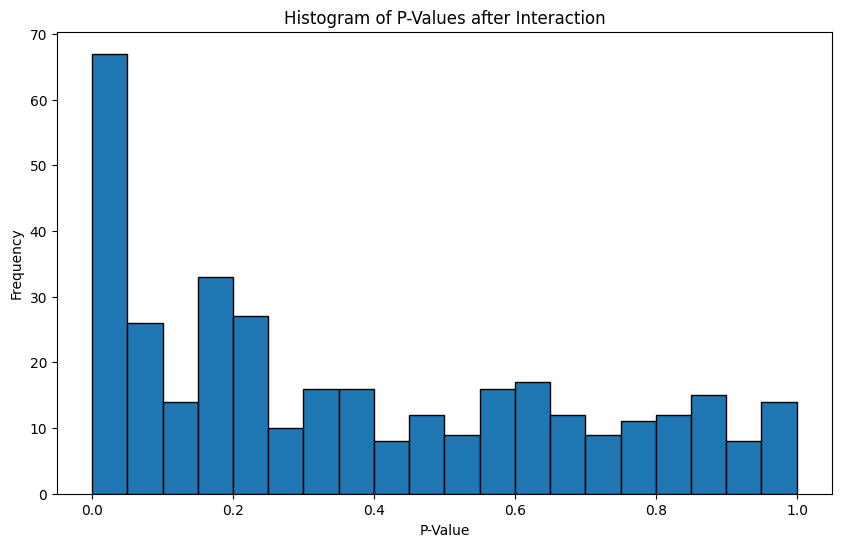

In [63]:
# Extract p-values
itac_p_values= model_itac.pvalues

# Create a histogram of p-values
plt.figure(figsize=(10, 6))
plt.hist(itac_p_values, bins=20, edgecolor='black')
plt.title('Histogram of P-Values after Interaction')
plt.xlabel('P-Value')
plt.ylabel('Frequency')
plt.show()

**9(b)**

With a significant frequency of about 0, the histogram  with the interaction model p- values (blue) shows a more equal distribution of p-values over the range. This implies that a large number of the p-values are low, suggesting statistical significance. With a big spike at 0.6 and a less uniform distribution, the original histogram (green) may indicate less statistically significant results. It also suggests a concentration of p-values in that region.

In [62]:

# getting the p-values of the new model with the interaction terms

itac_p_values=model_itac.pvalues

new_aplha_threshold=fdr(itac_p_values,0.1)

lst=[]
for i in itac_p_values:
    if i<=new_aplha_threshold:
        lst.append(i)
print('Number of True Discoveries:',len(lst))

Number of True Discoveries: 39


**9(c)**
1. With the same value of q=0.1 and the addition of interaction terms, the number of discoveries rises significantly from 7 (the Original Model) to 39 (the Model with interaction Terms). This may be because complex relationships between predictors and the response variable may be shown by the interaction terms, which have the ability to capture additional variance in the data that main effects alone are not able to.

2. However, since the likelihood of false positives increases with the number of tests performed, conducting more tests (due to additional interaction terms) may result in more false discoveries.